# Дипломная работа по курсу "Python для анализа данных"

### Задание 1
Загрузите файл HR.csv в pandas dataframe.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('HR.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Задание 2
Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение).

In [3]:
# mean - среднее, 50% - медиана, min/max - минимальное/максимальное значения, std - стандартное отклонение
# моду метод describe не выдаёт, так что считаем отдельно
data.describe().append(data.apply(lambda x: x.mode()).iloc[0]).rename(index = lambda x: 'mode' if x == 0 else x)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low


### Задание 3
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [4]:
# применяем коэффициент корреляции Пирсона
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<AxesSubplot:>

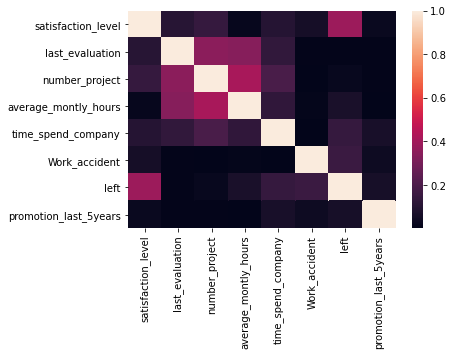

In [5]:
# для визуализации берём только абсолютные значения
sns.heatmap(data.corr().applymap(lambda x: abs(x)))

In [6]:
# ищем наименьшую корреляцию
data.corr().apply(lambda x: x.abs().min())

satisfaction_level       0.020048
last_evaluation          0.006567
number_project           0.004741
average_montly_hours     0.003544
time_spend_company       0.002120
Work_accident            0.002120
left                     0.006567
promotion_last_5years    0.003544
dtype: float64

Наименее скоррелированные переменные - time_spend_company и work_accident (коэффициент корреляции = 0.00212). Это означает, что количество проработанных в компании лет никак не связано с количество инцидентов на рабочем месте.

In [7]:
# ищем наибольшую корреляцию (корреляцию переменной с самой собой, естественно, не учитываем)
data.corr().apply(lambda x: x.loc[x != 1].abs().max())

satisfaction_level       0.388375
last_evaluation          0.349333
number_project           0.417211
average_montly_hours     0.417211
time_spend_company       0.196786
Work_accident            0.154622
left                     0.388375
promotion_last_5years    0.067433
dtype: float64

Наибольшая корреляция наблюдается между переменными number_project и average_montly_hours (коэффициент корреляции = 0.417). Взаимосвязь прямая, т. е. большее количество часов в месяц < = > большее количество проектов за время работы. Связь эта, впрочем, не линейная (модуль коэффициента корреляции мал по сравнению с 1). 

### Задание 4
Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [8]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### Задание 5
Показать распределение сотрудников по зарплатам.

In [9]:
pd.DataFrame({
    "amount": data.salary.value_counts(),
    "%" : data.salary.value_counts().apply(lambda x: (x/data.salary.count())*100)
})

,amount,%
low,7316,48.776585
medium,6446,42.976198
high,1237,8.247216


Видим, что почти 50% сотрудников компании имеют низкую зарплату. Менее 10% сотрудников имеют высокую зарплату.

### Задание 6
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [10]:
data.groupby(['department', 'salary']).apply(lambda row: row.salary.count())

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
dtype: int64

### Задание 7
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [55]:
# проведём t-тест для проверки данной гипотезы
# две выборки - сотрудники с высоким и низким окладом
# нулевая гипотеза - связи между выборками нет, т. е. различия случайны
import scipy.stats as stats
t, p = stats.ttest_ind(data[data.salary=='high'].average_montly_hours, data[data.salary=='low'].average_montly_hours, equal_var=False) 
t, p

(-0.7624331665385475, 0.4459045542257889)

p-value 0.44 для проведённого теста весьма большое, намного больше, чем уровень значимости в 5%. Значит, у нас нет оснований отвергать нулевую гипотезу. А значит, предположение, что работники с высоким окладом больше времени проводят на работе, неверно.

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

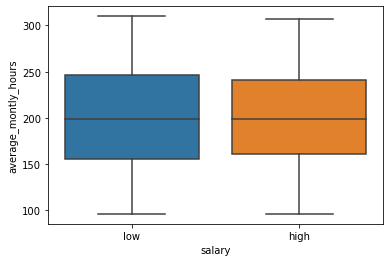

In [57]:
# мы можем также построить boxplot и наглядно увидеть отсутствие разницы между выборками
sns.boxplot(x="salary", y="average_montly_hours",
            data=data.loc[data.salary != 'medium'])

### Задание 8

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [13]:
data.groupby('left').agg({'promotion_last_5years': lambda x: len(x[x==1]) / len(x),
                          'satisfaction_level': lambda x: x.mean(),
                          'number_project': lambda x: x.mean()})

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


### Задание 9
Разделить данные на тестовую и обучающую выборки. 
Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
Оценить качество модели на тестовой выборке.

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
features = data.iloc[:, [0, 1, 2, 3, 4, 5, 7]]
target = data['left']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.predict(X_test)
accuracy_score(y_test, lda.predict(X_test))

0.7542222222222222

Показатель точности полученной модели - около 76%. Возможно, это не совсем надёжная оценка, т. к. исследуемые классы различаются по размерам (количество уволившихся сотрудников намного меньше не уволившихся).